# Burndown chart from JSON (trello)
    By Aleksandrs Krivickis, ak7993g@gre.ac.uk, aleksandrs.krivickis@gmail.com

In [55]:
import os
import json
import pandas
import matplotlib.pyplot as plt
import datetime

In [56]:
pandas.set_option('display.max_rows', 50)
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.width', 1000)

In [57]:
TRELLO_EXPORT_FILE = "./xC7CBjBU.json"

In [58]:
with open(TRELLO_EXPORT_FILE, encoding="utf8") as data_file:
    trello_data = json.load(data_file)

In [59]:
trello_data_cards = pandas.DataFrame(trello_data["cards"])
trello_data_cards.sample(3)

,id,address,checkItemStates,closed,coordinates,creationMethod,dateLastActivity,desc,descData,dueReminder,idBoard,idLabels,idList,idMembersVoted,idShort,idAttachmentCover,limits,locationName,manualCoverAttachment,name,pos,shortLink,isTemplate,badges,dueComplete,due,email,idChecklists,idMembers,labels,shortUrl,subscribed,url,cover,attachments,pluginData,customFieldItems
20,5e3ca220d00fae6ed71d6aa2,None,None,False,None,None,2020-02-18T22:50:25.750Z,"As a legal entity (university), I would like c...",None,1440.0,5e2ae2d856a6497bedfd250c,[],5e2ae3005716647617ec16ff,[],68,None,"{'attachments': {'perCard': {'status': 'ok', '...",None,False,Web Designer - Terms and conditions,229376.843746,sXx3hhJr,False,"{'attachmentsByType': {'trello': {'board': 0, ...",False,2020-03-13T20:53:00.000Z,aleksandrskri+2rjbwojzbjl6a7rujm7+2tsjpmnxbyyb...,[],[],[],https://trello.com/c/sXx3hhJr,False,https://trello.com/c/sXx3hhJr/68-web-designer-...,"{'idAttachment': None, 'color': None, 'idUploa...",[],[],[]
43,5e3d9fb538bac67c77064636,None,None,False,None,None,2020-02-18T13:04:05.260Z,,None,1440.0,5e2ae2d856a6497bedfd250c,[],5e2ae31c90cda0511b766d7b,[],84,None,"{'attachments': {'perCard': {'status': 'ok', '...",None,False,Scrum Master - Add database creation and popul...,49152.000000,9YnOErxg,False,"{'attachmentsByType': {'trello': {'board': 0, ...",False,2020-02-21T20:53:00.000Z,aleksandrskri+2rjbwojzbjl6a7rujm7+2tsp4mqlfiaq...,[],[5c25f68286f41e2f122155cf],[],https://trello.com/c/9YnOErxg,True,https://trello.com/c/9YnOErxg/84-scrum-master-...,"{'idAttachment': None, 'color': None, 'idUploa...",[],[],[]
22,5e2b03b4f25fc02833522cd4,None,None,False,None,None,2020-02-18T22:50:25.729Z,,None,1440.0,5e2ae2d856a6497bedfd250c,[],5e2ae3005716647617ec16ff,[],20,None,"{'attachments': {'perCard': {'status': 'ok', '...",None,False,Engineer - Notification of new idea to departm...,262144.843746,S3mYsWnN,False,"{'attachmentsByType': {'trello': {'board': 0, ...",False,2020-03-13T20:53:00.000Z,aleksandrskri+2rjbwojzbjl6a7rujm7+2tpvd4mythd3...,[],[],[],https://trello.com/c/S3mYsWnN,False,https://trello.com/c/S3mYsWnN/20-engineer-noti...,"{'idAttachment': None, 'color': None, 'idUploa...",[],[],[]


In [60]:
len(trello_data_cards)

93

# Exporting user stories

In [61]:
trello_data_cards[["name", "due"]].to_excel("user_stories.xlsx")

# Extracting necessary features

In [62]:
trello_data_cards_reindexed = trello_data_cards[["name", "dateLastActivity", "due", "dueComplete", "closed"]]
trello_data_cards_reindexed["due"] = trello_data_cards_reindexed["due"].apply(lambda x: "2020-03-13T19:45:00.000Z" if x==None else x)

trello_data_cards_reindexed["due"] = pandas.to_datetime(trello_data_cards_reindexed["due"]).dt.date
trello_data_cards_reindexed = trello_data_cards_reindexed.sort_values('due', ascending=False).reset_index().drop("index", axis=1)
trello_data_cards_reindexed = trello_data_cards_reindexed.reindex(index=trello_data_cards_reindexed.index[::-1])

trello_data_cards_reindexed = trello_data_cards_reindexed.reset_index()
trello_data_cards_reindexed.columns = ['cards_remaining', 'name', 'dateLastActivity', 'due', 'dueComplete', 'closed']
trello_data_cards_reindexed[:10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,cards_remaining,name,dateLastActivity,due,dueComplete,closed
0,92,Scrum Master - Establish agile scrum methods -...,2020-02-21T14:22:26.103Z,2020-01-31,True,False
1,91,Scrum Master - assign roles - 1 - 0.1,2020-02-21T14:22:26.103Z,2020-01-31,True,False
2,90,Scrum Master - System Architecture Design - 5 ...,2020-02-21T14:22:26.099Z,2020-01-31,True,False
3,89,Database Designer - Database Design - 13 - Sam...,2020-02-21T14:22:26.107Z,2020-01-31,True,False
4,88,Web Designer - Implement website design sketch,2020-02-21T14:22:26.154Z,2020-02-03,True,False
5,87,Web Designer - Implement mobile website design...,2020-02-21T14:22:26.169Z,2020-02-07,True,False
6,86,Web Designer - Implement Design For Views - Re...,2020-02-21T14:22:26.198Z,2020-02-07,True,False
7,85,Web Designer - Implement Design for Mobile vie...,2020-02-21T14:22:26.184Z,2020-02-07,True,False
8,84,Scrum Master - Burndown Chart,2020-02-21T14:22:26.170Z,2020-02-07,True,False
9,83,Product Owner - analyse project's example repo...,2020-02-21T14:22:26.166Z,2020-02-07,True,False


In [63]:
trello_data_cards_reindexed["due"] = pandas.to_datetime(trello_data_cards_reindexed["due"]).dt.date

In [68]:
# planned_burndown = trello_data_cards_reindexed.groupby(by="due").first()
# planned_burndown

In [69]:
ideal_burndown = pandas.DataFrame([
    {"due": trello_data_cards_reindexed.due.min(), "cards_remaining": trello_data_cards_reindexed.cards_remaining.max()},
    {"due": trello_data_cards_reindexed.due.max(), "cards_remaining": trello_data_cards_reindexed.cards_remaining.min()},
])

ideal_burndown = ideal_burndown.set_index("due")
ideal_burndown

,cards_remaining
due,
2020-01-31,92
2020-03-24,0


In [70]:
actual_burndown = trello_data_cards_reindexed[trello_data_cards_reindexed["dueComplete"]==True].groupby(by="due").first()
actual_burndown

,cards_remaining,name,dateLastActivity,dueComplete,closed
due,,,,,
2020-01-31,92,Scrum Master - Establish agile scrum methods -...,2020-02-21T14:22:26.103Z,True,False
2020-02-03,88,Web Designer - Implement website design sketch,2020-02-21T14:22:26.154Z,True,False
2020-02-07,87,Web Designer - Implement mobile website design...,2020-02-21T14:22:26.169Z,True,False
2020-02-14,75,Engineer - View List of Ideas - Simple grid view,2020-02-21T14:22:26.204Z,True,False
2020-02-21,64,Engineer - Logout component - 1,2020-02-21T14:24:15.274Z,True,False


# Generating visualisation

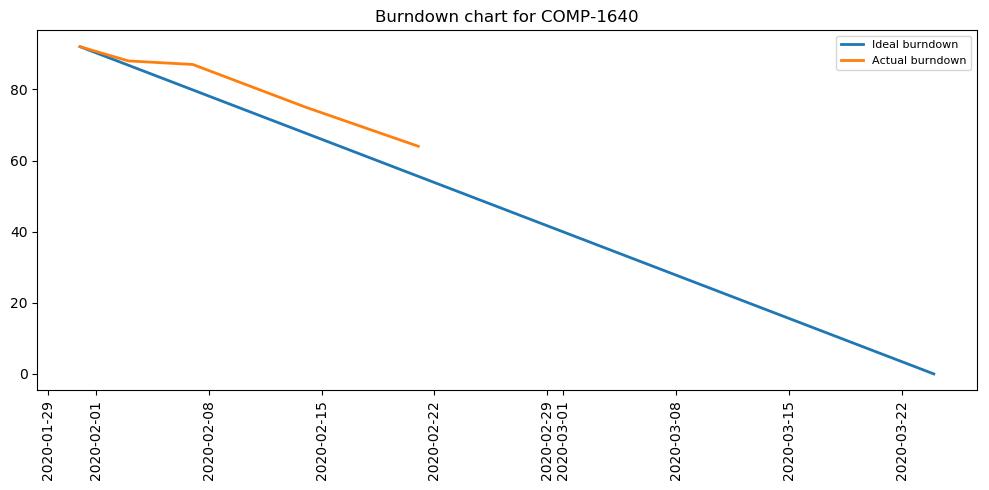

In [71]:
PLT_LINE_WIDTH = 2
fig = plt.figure(figsize=(10,5), dpi=100)
# plt.plot(planned_burndown.cards_remaining, label='Planned burndown', linewidth=PLT_LINE_WIDTH)
plt.plot(ideal_burndown.cards_remaining, label='Ideal burndown', linewidth=PLT_LINE_WIDTH)
plt.plot(actual_burndown.cards_remaining, label='Actual burndown', linewidth=PLT_LINE_WIDTH)


plt.title('Burndown chart for COMP-1640')
plt.legend(loc='upper right', fontsize=8)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.savefig("burndown_chart_" + str(datetime.datetime.now().date()) + ".jpeg", transparent=False, portrait=False)